In [10]:
import os

os.environ['POLARS_MAX_THREADS'] = '16'

import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

In [35]:
gdf = gpd.read_parquet('data/adresser_voronoi.pq')
gdf_kom = gdf[gdf['kommunekode']==147].reset_index(drop=True)
gdf_kom.head()

,vejnavn,husnr,postnr,kommunekode,landsdelsnuts3,etrs89_east,etrs89_north,points,dagi_id,code,name,regionskode,udenforkommuneinddeling,regionsnavn,changed,geo_changed,geo_version,visual_center,geometry
0,Nyelandsvej,78,2000,147,DK011,721167.76,6176714.85,POINT (721167.76 6176714.85),389104,147,Frederiksberg,1084,False,Region Hovedstaden,2024-01-16,2024-01-16,7,POINT (12.52373 55.67937),"POLYGON ((719534.73 6175913.146, 719534.138 61..."
1,Buen,12,2000,147,DK011,719905.99,6176389.14,POINT (719905.99 6176389.14),389104,147,Frederiksberg,1084,False,Region Hovedstaden,2024-01-16,2024-01-16,7,POINT (12.52373 55.67937),"POLYGON ((719533.286 6175890.689, 719533.731 6..."
2,Duevej,56,2000,147,DK011,721810.13,6177364.00,POINT (721810.13 6177364),389104,147,Frederiksberg,1084,False,Region Hovedstaden,2024-01-16,2024-01-16,7,POINT (12.52373 55.67937),"POLYGON ((719503.949 6175895.433, 719509.12 61..."
3,Buen,15,2000,147,DK011,719838.09,6176381.92,POINT (719838.09 6176381.92),389104,147,Frederiksberg,1084,False,Region Hovedstaden,2024-01-16,2024-01-16,7,POINT (12.52373 55.67937),"POLYGON ((719532.499 6175879.578, 719533.44 61..."
4,Buen,19,2000,147,DK011,719863.01,6176392.29,POINT (719863.01 6176392.29),389104,147,Frederiksberg,1084,False,Region Hovedstaden,2024-01-16,2024-01-16,7,POINT (12.52373 55.67937),"POLYGON ((719532.499 6175879.578, 719533.731 6..."


In [4]:
from scipy.spatial import KDTree

In [ ]:
no_of_schools = 14
neighboring_adrs_to_school = 20

random_adr = gdf_kom.sample(no_of_schools, random_state=1234).reset_index(drop=True)

# remove these from df?

schools_adr = random_adr[['etrs89_east', 'etrs89_north']].to_numpy()
all_adr = gdf_kom[['etrs89_east', 'etrs89_north']].to_numpy()
kd_tree = KDTree(all_adr)
dist, idx = kd_tree.query(schools_adr, k=neighboring_adrs_to_school, workers=8)

In [74]:
gdf_kom['school_id'] = np.nan

<Axes: >

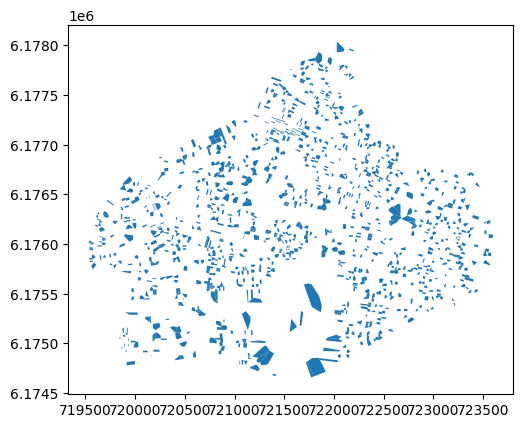

In [75]:
for i,j in enumerate(idx):
    gdf_kom.loc[idx[i], ['school_id']] = j
gdf_kom.dissolve(by = 'school_id').plot()

In [72]:
gdf_kom['school_id'].describe()

count    2836.000000
mean     4842.318406
std      2742.584153
min         2.000000
25%      2450.750000
50%      4838.500000
75%      7265.750000
max      9567.000000
Name: school_id, dtype: float64

In [66]:
gdf_kom['school_id']

0       NaN
1       NaN
2       2.0
3       NaN
4       NaN
       ... 
9564    NaN
9565    NaN
9566    NaN
9567    NaN
9568    NaN
Name: school_id, Length: 9569, dtype: float64

<Axes: >

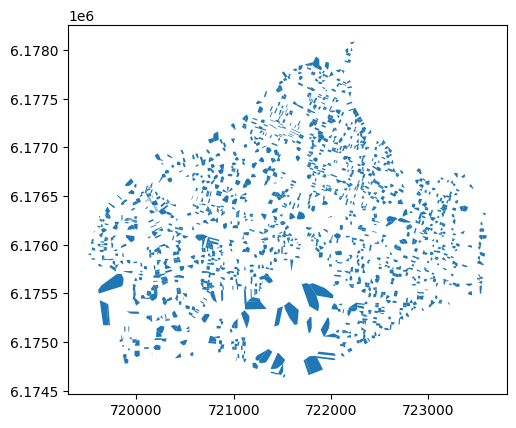